# Regression Project: Steam Games Price Prediction

## Introduction



![image](https://user-images.githubusercontent.com/35566625/142236593-73fc6240-ed3f-42ba-b325-deba23776a21.png)

> 
>> Steam is a popular video game digital distribution service where gamers view and download games of their interest. Due to the increase in E-Sports, there are a number of games which have caught the interest of youth of this generation. Steam is home to a million games which are both Free to Play as well as purchase to play including all new releases, their ratings, reviews etc.


> ## Goals
> 
>> To predict the price of each game.



> ## Data Description

>> I will scrape data from [Steam Website](https://store.steampowered.com/search/?term=), and I will target each game data and in this project I plan to use these **target & features**:

 | Target  |  Data Type |
 | ------------- | ------------- |
 | Price  | Numerical |
 
 ----
 
 | Feature  |  Data Type |
 | ------------- | ------------- |
 | Title | Categorical |
 | Release Year  | Numerical |
 | Game Rating | Numerical |
 | Users Reviewed | Numerical |
 | Platforms | Categorical |
 | achievements | Numerical |

In [476]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [420]:
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [ ]:
chromrdriver = "/Users/mac/Desktop/SDAIA/Regression Project/chromedriver"
os.environ["webdriver.chrome.driver"] = chromrdriver
driver = webdriver.Chrome(chromrdriver)
driver.get("https://store.steampowered.com/search/?term=")

#One can choose any number of pages to view by modifying the below parameters
#Due to computing power and time shortage, I have shown only 100 pages here
ScrollNumber = 400
for i in range(1,ScrollNumber):
    driver.execute_script("window.scrollTo(1,400)")
    time.sleep(5)

#file = open('DS.html', 'w')
#file.write(driver.page_source)
#file.close()

with open('DS.html', "w", encoding="utf-8") as f:
    f.write(driver.page_source)

driver.close()

In [100]:
data = open('DS.html',encoding='utf-8')

In [101]:
doc = BeautifulSoup(data, "html.parser")

In [102]:
doc2 = BeautifulSoup(doc.prettify(),"html.parser")

In [103]:
print(doc2)

<html class="responsive" lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="#171a21" name="theme-color"/>
<title>
   Steam Search
  </title>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://store.cloudflare.steamstatic.com/public/shared/css/motiva_sans.css?v=2C1Oh9QFVTyK&amp;l=english&amp;_cdn=cloudflare" rel="stylesheet" type="text/css"/>
<link href="https://store.cloudflare.steamstatic.com/public/shared/css/shared_global.css?v=HgJ-vRcbYWPh&amp;l=english&amp;_cdn=cloudflare" rel="stylesheet" type="text/css"/>
<link href="https://store.cloudflare.steamstatic.com/public/shared/css/buttons.css?v=hFJKQ6HV7IKT&amp;l=english&amp;_cdn=cloudflare" rel="stylesheet" type="text/css"/>
<link href="https://store.cloudflare.steamstatic.com/public/css/v6/store.css?v=PwckfHNPKT6i&amp;l=english&amp;_cdn=cloudflare" rel="stylesheet" type="text/cs

In [ ]:
spans = doc2.find_all('span', {'class' : 'title'})
names = [span.get_text() for span in spans]
ls_names = []
for name in names:
    ls_names.append(name.strip())

In [ ]:
divs = doc2.find_all('div', {'class' : ['col search_price responsive_secondrow','col search_price discounted responsive_secondrow']})
prices = [div.get_text() for div in divs]
ls_prices = []
for price in prices:
    ls_prices.append(price.strip())

In [106]:
divrr = doc2.find_all('div', {'class' : 'col search_released responsive_secondrow'})
release_date = [div.get_text() for div in divrr]
ls_release = []
for release in release_date:
    ls_release.append(release.strip())

In [107]:
revs = doc2.find_all('span', {'class' : ['search_review_summary positive','search_review_summary mixed','search_review_summary negative']})

In [108]:
print(len(ls_names))
print(len(ls_prices))
print(len(ls_release))
print(len(revs))

800
800
800
791


In [109]:
trying = doc2.find_all('div',{'class':"col search_reviewscore responsive_secondrow"})

In [110]:
ls = []
for i in trying:
    n = str(i).split("<")[2].split(";")
    ls.append(n)

In [112]:
rev_list = []
for i in range(800):
    if len(ls[i])>2:
        rev_list.append(ls[i][2])
    else:
        rev_list.append('No user reviews yet')

In [113]:
rating_rev = []
for j in rev_list:
    rating_rev.append((j[:3]))

In [114]:
user_rev = []
for j in range(len(rev_list)):
    user_rev.append(rev_list[j].split(" ")[3])

In [246]:
plats = []
platforms = doc2.find_all('span', {'class' : 'platform_img'},callable)
for i in range(len(platforms)):
    plats.append(platforms[i])

In [247]:
plats

[<span class="platform_img win">
 </span>,
 <span class="platform_img mac">
 </span>,
 <span class="platform_img linux">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img mac">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img mac">
 </span>,
 <span class="platform_img linux">
 </span>,
 <span class="platform_img win">
 </span>,
 <span class="platform_img mac">
 </span>,
 <span 

In [115]:
games = pd.DataFrame(list(zip(ls_names,ls_prices,ls_release,rating_rev,user_rev)),
                     columns=['Title','Price','Release Date','Game Rating','Users Reviewed'])

In [116]:
games['len>12'] = games['Price'].str.len()>12

In [117]:
for a in range(len(ls_names)):
    if games['len>12'][a]==True:
        games['Price'][a] = games['Price'][a].strip()[40:]

In [118]:
games.drop(columns=['len>12'],inplace=True)

In [119]:
games

,Title,Price,Release Date,Game Rating,Users Reviewed
0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,Red Dead Redemption 2,114.50 SR,"5 Dec, 2019",86%,"197,785"
3,Farming Simulator 22,179.00 SR,"21 Nov, 2021",85%,"6,973"
4,Forza Horizon 5,249.00 SR,"8 Nov, 2021",85%,"36,986"
...,...,...,...,...,...
795,NARAKA BLADEPOINT - Deluxe DLC,85.00 SR,"12 Aug, 2021",47%,342
796,Graveyard Keeper - Better Save Soul,21.95 SR,"27 Oct, 2021",50%,136
797,Total War: WARHAMMER - Call of the Beastmen,31.50 SR,"28 Jul, 2016",57%,"1,278"
798,60 Seconds! Reatomized,12.50 SR,"25 Jul, 2019",94%,"5,734"


In [120]:
games.to_csv('Complete_Games_List.csv')

<h4>I extracted 800 out of a million games available on steam. The same data is saved in a csv format.

<h4>Now I have another csv file which I want to use it with the one I have, so I should merged them together so I can use them.

In [421]:
scrape_df = pd.read_csv('/Users/mac/Desktop/SDAIA/Regression Project/Complete_Games_List.csv')
another_df = pd.read_csv('/Users/mac/Desktop/SDAIA/Regression Project/Steam sales data.csv')

In [422]:
scrape_df.head(5)

,Unnamed: 0,Title,Price,Release Date,Game Rating,Users Reviewed
0,0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,2,Red Dead Redemption 2,114.50 SR,"5 Dec, 2019",86%,"197,785"
3,3,Farming Simulator 22,179.00 SR,"21 Nov, 2021",85%,"6,973"
4,4,Forza Horizon 5,249.00 SR,"8 Nov, 2021",85%,"36,986"


In [423]:
another_df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,01/11/2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,01/04/1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,01/05/2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,01/06/2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,01/11/1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [424]:
another_df['name']

0                    Counter-Strike
1             Team Fortress Classic
2                     Day of Defeat
3                Deathmatch Classic
4         Half-Life: Opposing Force
                    ...            
27070               Room of Pandora
27071                     Cyber Gun
27072              Super Star Blast
27073    New Yankee 7: Deer Hunters
27074                     Rune Lord
Name: name, Length: 27075, dtype: object

### we need to take platforms column from another_df to scrape_df so we can use it in our model

In [436]:
titles= pd.DataFrame(columns=['Title','plats', 'achievements'])
names=pd.DataFrame(columns=['Title', 'plats','achievements'])

titles['Title'] = scrape_df['Title'].str[:5]
names['Title'] = another_df['name'].str[:5]
names['plats'] = another_df['platforms']
names['achievements'] = another_df['achievements']

In [437]:
titles

,Title,plats,achievements
0,Count,NaN,NaN
1,Apex,NaN,NaN
2,Red D,NaN,NaN
3,Farmi,NaN,NaN
4,Forza,NaN,NaN
...,...,...,...
795,NARAK,NaN,NaN
796,Grave,NaN,NaN
797,Total,NaN,NaN
798,60 Se,NaN,NaN


In [438]:
names

,Title,plats,achievements
0,Count,windows;mac;linux,0
1,Team,windows;mac;linux,0
2,Day o,windows;mac;linux,0
3,Death,windows;mac;linux,0
4,Half-,windows;mac;linux,0
...,...,...,...
27070,Room,windows,7
27071,Cyber,windows,0
27072,Super,windows,24
27073,New Y,windows;mac,0


In [439]:
result = pd.merge(titles, names, on="Title")

In [440]:
result = result.drop_duplicates(['Title'])

In [441]:
result

,Title,plats_x,achievements_x,plats_y,achievements_y
0,Count,NaN,NaN,windows;mac;linux,0
19,Apex,NaN,NaN,windows,15
27,Red D,NaN,NaN,windows,15
31,Farmi,NaN,NaN,windows;mac,12
58,Halo,NaN,NaN,windows,75
...,...,...,...,...,...
13875,Child,NaN,NaN,windows,16
13888,Spelu,NaN,NaN,windows,35
13889,STEIN,NaN,NaN,windows,42
13891,Shove,NaN,NaN,windows;mac;linux,85


In [442]:
scrape_df['Title_s'] = scrape_df['Title'].str[:5]

In [443]:
result = result.rename(columns={'Title': 'Title_s'})

In [483]:
df = pd.merge(result, scrape_df, on="Title_s")

## Data Wrangling

In [484]:
df

,Title_s,plats_x,achievements_x,plats_y,achievements_y,Unnamed: 0,Title,Price,Release Date,Game Rating,Users Reviewed
0,Count,NaN,NaN,windows;mac;linux,0,0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,Apex,NaN,NaN,windows,15,1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,Apex,NaN,NaN,windows,15,232,Apex Legends™ - Champion Edition,132.30 SR,"5 Nov, 2020",86%,338
3,Apex,NaN,NaN,windows,15,403,Apex Legends™ - Loba Edition,109.00 SR,"2 Nov, 2021",90%,116
4,Apex,NaN,NaN,windows,15,584,Apex Legends™ - Octane Edition,76.30 SR,"5 Nov, 2020",89%,312
...,...,...,...,...,...,...,...,...,...,...,...
692,Child,NaN,NaN,windows,16,783,Children of Morta,15.98 SR,"3 Sep, 2019",91%,"8,545"
693,Spelu,NaN,NaN,windows,35,785,Spelunky 2,26.21 SR,"29 Sep, 2020",93%,"11,932"
694,STEIN,NaN,NaN,windows,42,786,STEINS;GATE,18.78 SR,"9 Sep, 2016",97%,"10,390"
695,Shove,NaN,NaN,windows;mac;linux,85,792,Shovel Knight: Treasure Trove,32.97 SR,"26 Jun, 2014",96%,"11,398"


In [485]:
#Now, we going to remove some columns from our dataframe
df.drop(['Title_s', 'plats_x', 'achievements_x', 'Unnamed: 0'], axis=1, inplace=True)

In [486]:
df.head(5)

,plats_y,achievements_y,Title,Price,Release Date,Game Rating,Users Reviewed
0,windows;mac;linux,0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,windows,15,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,windows,15,Apex Legends™ - Champion Edition,132.30 SR,"5 Nov, 2020",86%,338
3,windows,15,Apex Legends™ - Loba Edition,109.00 SR,"2 Nov, 2021",90%,116
4,windows,15,Apex Legends™ - Octane Edition,76.30 SR,"5 Nov, 2020",89%,312


In [487]:
#I will reorder the columns 
df = df[['Title', 'Price','Release Date', 'Game Rating', 'plats_y', 'Users Reviewed', 'achievements_y']]

In [488]:
df.head(2)

,Title,Price,Release Date,Game Rating,plats_y,Users Reviewed,achievements_y
0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,windows;mac;linux,"6,038,424",0
1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,windows,"351,931",15


In [489]:
#Renaming columns
df = df.rename(columns={'Title': 'name', 'Price': 'price', 'Release Date':'release_year','Game Rating':'game_rating','plats_y':'platforms','Users Reviewed':'users_reviewed', 'achievements_y':'achievements'})

In [490]:
df.head(2)

,name,price,release_year,game_rating,platforms,users_reviewed,achievements
0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,windows;mac;linux,"6,038,424",0
1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,windows,"351,931",15


In [491]:
#check if there is any null value in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 696
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            697 non-null    object
 1   price           683 non-null    object
 2   release_year    689 non-null    object
 3   game_rating     697 non-null    object
 4   platforms       697 non-null    object
 5   users_reviewed  697 non-null    object
 6   achievements    697 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 43.6+ KB


In [492]:
#it seems we have null values so we should deal with it 
df.isna().sum()

name               0
price             14
release_year       8
game_rating        0
platforms          0
users_reviewed     0
achievements       0
dtype: int64

In [493]:
df = df.dropna()

### Now, after I removed the null values I will work on each column to be ready for the EDA and next phases

In [494]:
#first, price column (need to remove SR and edit Free to play to 0) so we can convert it to float
#Notice that my prices are in Saudi Riyals

df['price'] = df['price'].str.split('SR').str[0]
df['price'] = df['price'].str.strip()
df['price'] = df['price'].str.replace('Free to Play', '0')
df['price'] = df['price'].str.replace('Free To Play', '0')
df['price'] = df['price'].str.replace('Free', '0')
#Change price data type to float
df['price'] = df['price'].astype(float)

In [495]:
df['price'].head(5)

0      0.0
1      0.0
2    132.3
3    109.0
4     76.3
Name: price, dtype: float64

In [498]:
#Next, column will work on it is release_date because it is not in a date format
from datetime import datetime

df['release_year'] = pd.to_datetime(df['release_year'])
df['release_year'] = pd.DatetimeIndex(df['release_year']).year

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 696
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            676 non-null    object 
 1   price           676 non-null    float64
 2   release_year    676 non-null    int64  
 3   game_rating     676 non-null    object 
 4   platforms       676 non-null    object 
 5   users_reviewed  676 non-null    object 
 6   achievements    676 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 42.2+ KB


In [501]:
df['release_year'].head(2)

0    2012
1    2020
Name: release_year, dtype: int64

In [502]:
#Ratings should be in a an interval [0-1] so we can work with it 

df['game_rating'] = df['game_rating'].map(lambda x:x.rstrip('%'))

In [503]:
df.drop(df[df['game_rating'] == 'No '].index,inplace=True)
df['game_rating'] = df['game_rating'].astype(float)
df['game_rating'] = df['game_rating'].map(lambda x: x/100)

In [504]:
df['game_rating'].head(2)

0    0.88
1    0.86
Name: game_rating, dtype: float64

In [505]:
#change users_reviewed data type to integer
df['users_reviewed'] = df['users_reviewed'].str.replace(',','')
df['users_reviewed'] = df['users_reviewed'].astype(int)

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 696
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            669 non-null    object 
 1   price           669 non-null    float64
 2   release_year    669 non-null    int64  
 3   game_rating     669 non-null    float64
 4   platforms       669 non-null    object 
 5   users_reviewed  669 non-null    int64  
 6   achievements    669 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 41.8+ KB


In [507]:
df.head(5)

,name,price,release_year,game_rating,platforms,users_reviewed,achievements
0,Counter-Strike: Global Offensive,0.0,2012,0.88,windows;mac;linux,6038424,0
1,Apex Legends™,0.0,2020,0.86,windows,351931,15
2,Apex Legends™ - Champion Edition,132.3,2020,0.86,windows,338,15
3,Apex Legends™ - Loba Edition,109.0,2021,0.90,windows,116,15
4,Apex Legends™ - Octane Edition,76.3,2020,0.89,windows,312,15


#### Thats my final dataframe that I will work on it

### I removed the null values, and change data types of some columns, now we move to EDA

## Exploratory Data Analysis

In [508]:
df.corr()

,price,release_year,game_rating,users_reviewed,achievements
price,1.000000,0.266813,-0.084116,-0.071753,-0.044884
release_year,0.266813,1.000000,-0.219790,-0.209248,-0.004381
game_rating,-0.084116,-0.219790,1.000000,0.082149,0.005121
users_reviewed,-0.071753,-0.209248,0.082149,1.000000,-0.013392
achievements,-0.044884,-0.004381,0.005121,-0.013392,1.000000


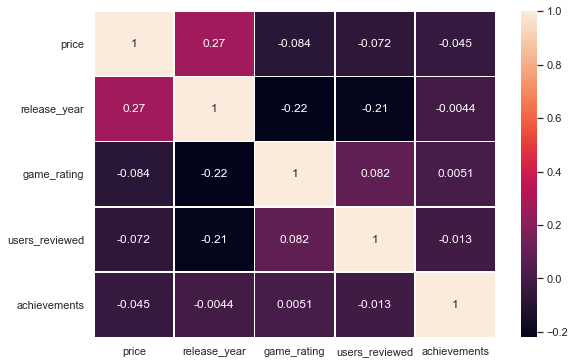

In [512]:
#Creating a heatmap to see if there is any correlation between features
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax);

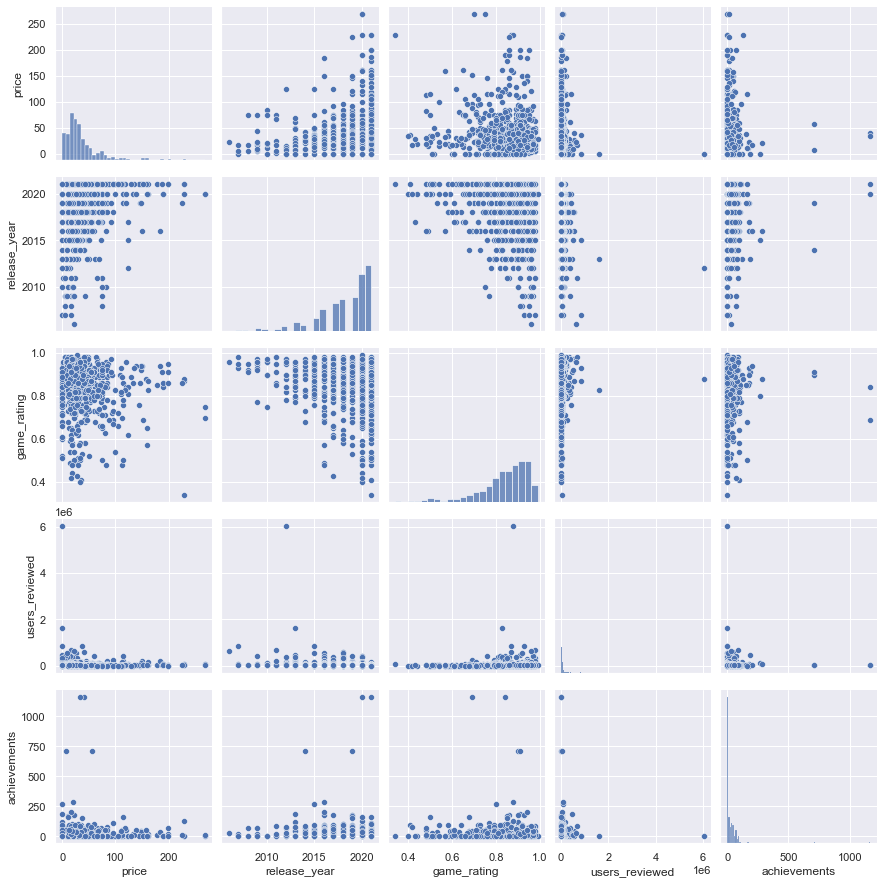

In [514]:
#Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df);